In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/Namsik-Lab/딥러닝 공부/keras/data/'

In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
dataset = pd.read_csv(root_dir+'diabetes.csv')
## 임신횟수, 포도당 내성,혈압, 삼두근 피부두께,인슐린,체질량,당뇨,나이
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.iloc[0:700,0:8].values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  0.   ,  99.   ,   0.   , ...,  25.   ,   0.253,  22.   ],
       [  4.   , 127.   ,  88.   , ...,  34.5  ,   0.598,  28.   ],
       [  4.   , 118.   ,  70.   , ...,  44.5  ,   0.904,  26.   ]])

In [0]:
x_train = dataset.iloc[0:700,0:8].values
y_train = dataset.iloc[0:700,8].values
x_test = dataset.iloc[700:,0:8].values
y_test = dataset.iloc[700:,8].values

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
# loss = 현재 가중치 세트를 평가하는데 사용한 손실함수, 
# optimizer = 최적가중치 검색 알고리즘(여기선 SGD방법중 하나인 adam),
# metrics = 평가 척도, 일반적으로 accuracy

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


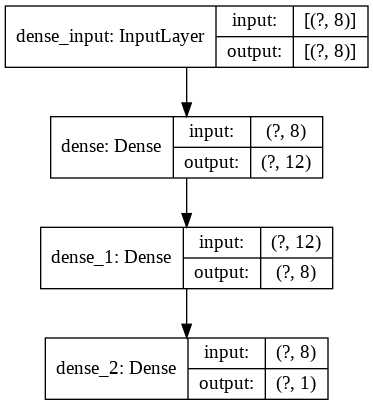

In [15]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes= True)

In [16]:
model.fit(x_train,y_train,epochs = 1500, batch_size=2)
## batch_size = 학습할때 문제를 몇번풀고 정답을 확인하는지를 결정하는 값
## 만약 batch_size = 64라면 총 64개의 데이터를 학습한 다음 가중치를 1번 갱신하게됨
## 100문제를 풀고 가중치를 갱신하는 것과, 1문제를 풀고 가중치를 갱신하는 것은 
## 학습 결과에 큰 차이가 있음
## 사람이 문제집으로 공부를 하는 것과 비슷
## 100문제를 풀고 한 번에 채점하면서 학습하는 것과, 
## 1문제를 풀고 채점한 다음 다음 문제를 푸는 것과 비슷합니다.
## batch_size 값이 크면 클수록 여러 데이터를 기억하고 있어야 하기에 메모리가 커야함.
## 그대신 학습 시간이 빨라집니다. 
## batch_size 값이 작으면 학습은 꼼꼼하게 이루어질 수 있지만 학습 시간이 많이 걸립니다.

700/700 [==============================] - 0s 649us/sample - loss: 0.4039 - acc: 0.8057
Epoch 771/1500
700/700 [==============================] - 0s 641us/sample - loss: 0.4064 - acc: 0.7886
Epoch 772/1500
700/700 [==============================] - 0s 628us/sample - loss: 0.4033 - acc: 0.8000
Epoch 773/1500
700/700 [==============================] - 0s 630us/sample - loss: 0.4018 - acc: 0.8071
Epoch 774/1500
700/700 [==============================] - 0s 637us/sample - loss: 0.4088 - acc: 0.7929
Epoch 775/1500
700/700 [==============================] - 0s 639us/sample - loss: 0.4008 - acc: 0.7957
Epoch 776/1500
700/700 [==============================] - 0s 625us/sample - loss: 0.3990 - acc: 0.7957
Epoch 777/1500
498/700 [====================>.........] - ETA: 0s - loss: 0.4262 - acc: 0.7912

KeyboardInterrupt: ignored

In [17]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 369us/sample - loss: 0.4679 - acc: 0.7500
acc: 75.00%
